Part 1: Data Preparation and Exploration

1. Use the same dataset that we used for the previous assignment.

2. Handle missing values: Convert '?' to NaN and remove rows containing NaN values.

3. Drop duplicate records to ensure data integrity.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv('processed.cleveland.data', names=columns) 

In [8]:
df.replace('?', np.nan, inplace=True)

df.dropna(inplace=True)

print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0

In [9]:
df.drop_duplicates(inplace=True)

print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0

Part 2: Advanced Data Visualization


1. Subplots for Numerical Features

· Create a 2x2 grid of subplots showing histograms of 'age', 'trestbps', 'chol', and 'thalach'.

· Ensure proper labels, titles, and colors for better readability.

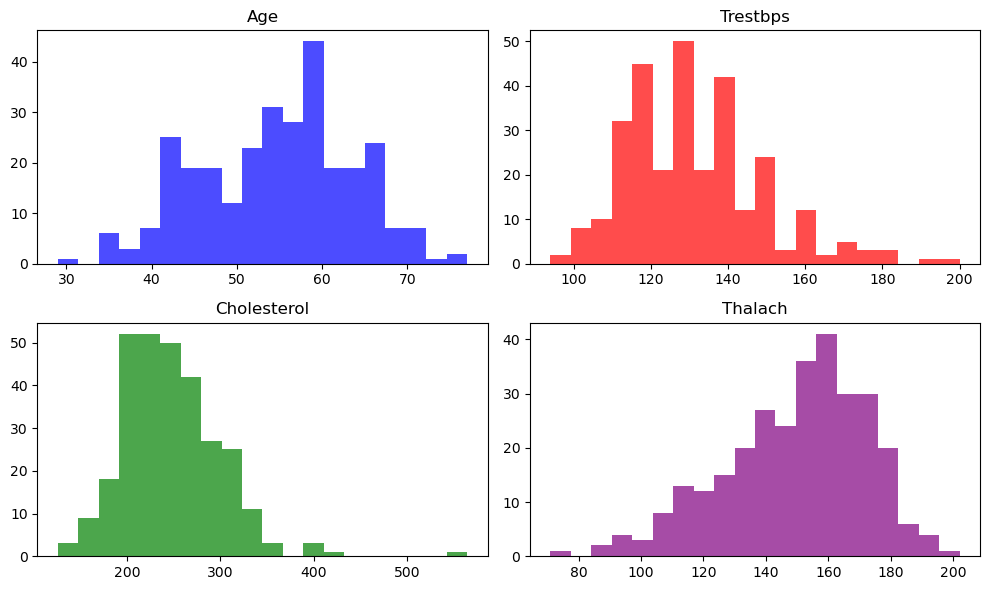

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  

axes[0, 0].hist(df['age'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_title("Age")

axes[0, 1].hist(df['trestbps'], bins=20, color='red', alpha=0.7)
axes[0, 1].set_title("Trestbps")

axes[1, 0].hist(df['chol'], bins=20, color='green', alpha=0.7)
axes[1, 0].set_title("Cholesterol")

axes[1, 1].hist(df['thalach'], bins=20, color='purple', alpha=0.7)
axes[1, 1].set_title("Thalach")


plt.tight_layout()  
plt.show()

2. Additional Subplots with Different Plot Types

· Create a 2x2 grid of subplots with different plot types using Matplotlib's pyplot functions:

o A line plot showing the trend of average 'thalach' across different age groups.

o A bar chart comparing the count of patients in each chest pain type.

o A pie chart showing the proportion of different target values.

o A scatter plot visualizing the relationship between 'chol' and 'thalach'.

3. Correlation Heatmap

· Compute the correlation matrix of numerical features.

· Use Seaborn's heatmap function to visualize the correlation.

· Interpret key correlations.

4. Boxplots of Key Features

· Create a boxplot of 'thalach' across different 'cp' (chest pain type) values.

· Set appropriate colors and labels to distinguish categories.

5. Pairplot for Feature Relationships

· Use Seaborn's pairplot to explore relationships among 'age', 'thalach', 'trestbps', and 'chol'.

· Use 'target' as the hue parameter.

6. Countplot for Categorical Features

· Create a countplot for 'cp' (chest pain type) with respect to 'target'.

· Differentiate patients with and without heart disease using color.

Part 3: Supervised Learning Model


1. Data Splitting and Preprocessing

· Separate features (X) and target (y).

· Split data into 80% training and 20% testing using train_test_split.

In [11]:
from sklearn.model_selection import train_test_split

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


4. Create a dataframe with the count of 'HeartHealth' for each 'AgeGroup' using the 'groupby' function. Learn about size() and unstack() functions.


2. Train and Apply a Supervised Learning Model

· Choose an algorithm and train a model.

· Make predictions on the test data.

· Calculate and display the accuracy of the model.

3. Model Visualization

· Create a bar plot to compare the number of actual vs. predicted values for each class.